In [1]:
import pandas as pd 
movie = pd.read_csv('data/movie.csv', index_col='movie_title')
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinner,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


Determine whether the duration of each movie is longer than two hours by using
the greater than comparison operator with the duration Series:

In [2]:
movie_2_hours = movie['duration'] > 120
movie_2_hours.head(10)

movie_title
Avatar                                         True
Pirates of the Caribbean: At World's End       True
Spectre                                        True
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
John Carter                                    True
Spider-Man 3                                   True
Tangled                                       False
Avengers: Age of Ultron                        True
Harry Potter and the Half-Blood Prince         True
Name: duration, dtype: bool

We can now use this Series determine the number of movies that are longer than two hours:

In [3]:
movie_2_hours.sum()

1039

To find the persentage of movies in the dataset longer than two hours, use the 'mean' method:

In [4]:
movie_2_hours.mean()

0.2113506916192026

We need to drop the missing values first, then
evaluate the condition and take the mean:

In [5]:
movie['duration'].dropna().gt(120).mean()

0.21199755152009794

Use the 'describe' method to output a few summary statistics on the boolean Series:

In [6]:
movie_2_hours.describe()

count      4916
unique        2
top       False
freq       3877
Name: duration, dtype: object

Use the 'value_counts' method to count with the 'normalize' parameter set to 'True' to get its distribution:

In [7]:
movie_2_hours.value_counts(normalize = True)

False    0.788649
True     0.211351
Name: duration, dtype: float64

It is possible to compare two columns from the same DatFrame to produce a boolian series:

For instances,we could determine the percentage of movies that have actor1 with more facebook likes than actor 2: 

To do this,we would select both of these columns and then drop any of two rows that had missing values for either movies:

Then we would make the comparision and calculate the mean:

In [8]:
actors = movie[['actor_1_facebook_likes',   
                'actor_2_facebook_likes']].dropna()
(actors['actor_1_facebook_likes'] >
 actors['actor_2_facebook_likes']).mean()

0.9777687130328371

In [9]:
movie = pd.read_csv('data/movie.csv',index_col='movie_title')

In [10]:
criteria1 = movie.imdb_score > 8
criteria2 = movie.content_rating == 'PG-13'
criteria3 = ((movie.title_year < 2000) |
             (movie.title_year > 2009))
criteria2.head() # all criteria Series look similar

movie_title
Avatar                                         True
Pirates of the Caribbean: At World's End       True
Spectre                                        True
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
Name: content_rating, dtype: bool

In [11]:
criteria_final = criteria1 & criteria2 & criteria3
criteria_final.head()

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
dtype: bool

What should happen if the expression in criteria 3 was written as follows:

In [12]:
movie.title_year < 2000 | movie.title_year > 2009

TypeError: cannot compare a dtyped [float64] array with a scalar of type [bool]

Read in the 'movie' dataset, set the index to the 'movie_title', and create the first set of criteria:

In [13]:
movie = pd.read_csv('data/movie.csv',index_col = 'movie_title')
crit_a1 = movie.imdb_score > 8
crit_a2 = movie.content_rating == 'PG-13'
crit_a3 = (movie.title_year < 2000) | (movie.title_year > 2009)
final_crit_a = crit_a1 & crit_a2 & crit_a3

Create criteria for the second set of movies: 

In [14]:
crit_b1 = movie.imdb_score < 5
crit_b2 = movie.content_rating == 'R'
crit_b3 = ((movie.title_year >= 2000) & 
           (movie.title_year <= 2010))
final_crit_b = crit_b1 & crit_b2 & crit_b3

Combine the two set of criteria using the pandas or operator. This yeilds a boolian series of all movies that are members of either set:

In [15]:
final_crit_all = final_crit_a | final_crit_b
final_crit_all.head()

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
dtype: bool

Once you have your boolean Series, you simply pass it to the indexing operator to filter the data:


In [16]:
movie[final_crit_all].head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
The Avengers,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
Captain America: Civil War,Color,Anthony Russo,516.0,147.0,94.0,11000.0,Scarlett Johansson,21000.0,407197282.0,Action|Adventure|Sci-Fi,...,1022.0,English,USA,PG-13,250000000.0,2016.0,19000.0,8.2,2.35,72000
Guardians of the Galaxy,Color,James Gunn,653.0,121.0,571.0,3000.0,Vin Diesel,14000.0,333130696.0,Action|Adventure|Sci-Fi,...,1097.0,English,USA,PG-13,170000000.0,2014.0,14000.0,8.1,2.35,96000
Interstellar,Color,Christopher Nolan,712.0,169.0,22000.0,6000.0,Anne Hathaway,11000.0,187991439.0,Adventure|Drama|Sci-Fi,...,2725.0,English,USA,PG-13,165000000.0,2014.0,11000.0,8.6,2.35,349000


We have successfully filtered the data and all the columns of the DataFrame.

We can't easily perform a manual check to determine whether the filter worked correctaly.

Lets filter both rows and columns with the .loc indexer:

In [17]:
cols = ['imdb_score','content_rating','title_year']
movie_filtered = movie.loc[final_crit_all, cols]
movie_filtered.head(10)

,imdb_score,content_rating,title_year
movie_title,,,
The Dark Knight Rises,8.5,PG-13,2012.0
The Avengers,8.1,PG-13,2012.0
Captain America: Civil War,8.2,PG-13,2016.0
Guardians of the Galaxy,8.1,PG-13,2014.0
Interstellar,8.6,PG-13,2014.0
Inception,8.8,PG-13,2010.0
The Martian,8.1,PG-13,2015.0
Town & Country,4.4,R,2001.0
Sex and the City 2,4.3,R,2010.0


In [18]:
final_crit_a2 = (movie.imdb_score > 8) & \
(movie.content_rating == 'PG-13') & \
((movie.title_year < 2000) |
(movie.title_year > 2009))
final_crit_a2.equals(final_crit_a)

True

In [19]:
college = pd.read_csv('data/college.csv')
college[college['STABBR'] == 'TX'].head()


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3610,Abilene Christian University,Abilene,TX,0.0,0.0,0.0,1,530.0,545.0,0.0,...,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
3611,Alvin Community College,Alvin,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
3612,Amarillo College,Amarillo,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
3613,Angelina College,Lufkin,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
3614,Angelo State University,San Angelo,TX,0.0,0.0,0.0,0,475.0,490.0,0.0,...,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5


To replicate this using index selection, we need to move the STABBR column into the indexer.

We can then used label based selection with the .loc indexer:

In [20]:
college2 = college.set_index('STABBR')
college2.loc['TX'].head()

,INSTNM,CITY,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
STABBR,,,,,,,,,,,,,,,,,,,,,
TX,Abilene Christian University,Abilene,0.0,0.0,0.0,1,530.0,545.0,0.0,3572.0,...,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
TX,Alvin Community College,Alvin,0.0,0.0,0.0,0,NaN,NaN,0.0,4682.0,...,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
TX,Amarillo College,Amarillo,0.0,0.0,0.0,0,NaN,NaN,0.0,9346.0,...,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
TX,Angelina College,Lufkin,0.0,0.0,0.0,0,NaN,NaN,0.0,3825.0,...,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
TX,Angelo State University,San Angelo,0.0,0.0,0.0,0,475.0,490.0,0.0,5290.0,...,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5


Compare the speed of both methods:

In [21]:
%timeit college[college['STABBR'] == 'TX']

2.55 ms ± 69.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [22]:
%timeit college2.loc['TX']

1.29 ms ± 64 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Boolian indexing takes three times as long as index selection .

As setting the index does not come for free , lets time that operation as well:

In [23]:
%timeit college2 = college.set_index('STABBR')

3.79 ms ± 161 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [24]:
states = ['TX', 'CA', 'NY']
college[college['STABBR'].isin(states)]
college2.loc[states]

,INSTNM,CITY,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
STABBR,,,,,,,,,,,,,,,,,,,,,
TX,Abilene Christian University,Abilene,0.0,0.0,0.0,1,530.0,545.0,0.0,3572.0,...,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
TX,Alvin Community College,Alvin,0.0,0.0,0.0,0,NaN,NaN,0.0,4682.0,...,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
TX,Amarillo College,Amarillo,0.0,0.0,0.0,0,NaN,NaN,0.0,9346.0,...,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
TX,Angelina College,Lufkin,0.0,0.0,0.0,0,NaN,NaN,0.0,3825.0,...,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
TX,Angelo State University,San Angelo,0.0,0.0,0.0,0,475.0,490.0,0.0,5290.0,...,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5
TX,Arlington Baptist College,Arlington,0.0,0.0,0.0,1,NaN,NaN,0.0,214.0,...,0.0000,0.0047,0.0000,0.1682,1,0.4978,0.4892,0.2251,34200,22905
TX,Arlington Career Institute,Grand Prairie,0.0,0.0,0.0,0,NaN,NaN,0.0,204.0,...,0.0000,0.0000,0.0000,0.2843,1,0.6186,0.7119,0.7745,27600,9500
TX,The Art Institute of Houston,Houston,0.0,0.0,0.0,0,NaN,NaN,0.0,1887.0,...,0.0000,0.0000,0.0419,0.3466,1,0.6183,0.7604,0.3845,32600,30750
TX,Austin College,Sherman,0.0,0.0,0.0,1,600.0,595.0,0.0,1272.0,...,0.0031,0.0267,0.0031,0.0016,1,0.2867,0.7581,0.0124,47800,26000


Read in the college dataset, create a separate DataFrame with STABBR as the
index, and check whether the index is sorted:

In [25]:
college = pd.read_csv('data/college.csv')
college2 = college.set_index('STABBR')
college2.index.is_monotonic


False

Sort the index from college2 and store it as another object:

In [26]:
college3 = college2.sort_index()
college3.index.is_monotonic

True

Time the selection of the state of Texas (TX) from all three DataFrames:

In [27]:
%timeit college[college['STABBR'] == 'TX']

2.46 ms ± 121 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [28]:
%timeit college2.loc['TX']

1.11 ms ± 33.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [29]:
%timeit college3.loc['TX']

421 µs ± 40.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


The sorted index performs nearly an order of magnitude faster than boolean
selection. Let's now turn towards unique indexes. For this, we use the institution
name as the index:

In [30]:
college_unique = college.set_index('INSTNM')
college_unique.index.is_unique

True

Let's select Stanford University with boolean indexing: 

In [31]:
college[college['INSTNM'] == 'Stanford University']

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
4217,Stanford University,Stanford,CA,0.0,0.0,0.0,0,730.0,745.0,0.0,...,0.1067,0.0819,0.0031,0.0,1,0.1556,0.1256,0.0401,86000,12782


Let's select Stanford University with index selection:

In [32]:
college_unique.loc['Stanford University']

CITY                  Stanford
STABBR                      CA
HBCU                         0
MENONLY                      0
WOMENONLY                    0
RELAFFIL                     0
SATVRMID                   730
SATMTMID                   745
DISTANCEONLY                 0
UGDS                      7018
UGDS_WHITE              0.3752
UGDS_BLACK              0.0591
UGDS_HISP               0.1607
UGDS_ASIAN              0.1979
UGDS_AIAN               0.0114
UGDS_NHPI               0.0038
UGDS_2MOR               0.1067
UGDS_NRA                0.0819
UGDS_UNKN               0.0031
PPTUG_EF                     0
CURROPER                     1
PCTPELL                 0.1556
PCTFLOAN                0.1256
UG25ABV                 0.0401
MD_EARN_WNE_P10          86000
GRAD_DEBT_MDN_SUPP       12782
Name: Stanford University, dtype: object

They both produce the same data, just with different objects. Let's time each
approach:


In [33]:
%timeit college[college['INSTNM'] == 'Stanford University']

2.34 ms ± 291 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [34]:
%timeit college_unique.loc['Stanford University']

338 µs ± 4.64 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Boolean selection gives much more flexibility than index selection as it is possible to
condition on any number of columns.

 In this recipe, we used a single column as the index. It is possible to concatenate multiple columns together to form an index

For instance, in the
following code, we set the index equal to the concatenation of the city and state columns:

In [35]:
college.index = college['CITY'] + ', ' + college['STABBR']
college = college.sort_index()
college.head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
"ARTESIA, CA",Angeles Institute,ARTESIA,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0175,0.0088,0.0088,0.0000,1,0.6275,0.8138,0.5429,NaN,16850
"Aberdeen, SD",Presentation College,Aberdeen,SD,0.0,0.0,0.0,1,440.0,480.0,0.0,...,0.0284,0.0142,0.0823,0.2865,1,0.4829,0.7560,0.3097,35900,25000
"Aberdeen, SD",Northern State University,Aberdeen,SD,0.0,0.0,0.0,0,480.0,475.0,0.0,...,0.0219,0.0425,0.0024,0.1872,1,0.2272,0.4303,0.1766,33600,24847
"Aberdeen, WA",Grays Harbor College,Aberdeen,WA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0937,0.0009,0.0250,0.1820,1,0.4530,0.1502,0.5087,27000,11490
"Abilene, TX",Hardin-Simmons University,Abilene,TX,0.0,0.0,0.0,1,508.0,515.0,0.0,...,0.0298,0.0159,0.0102,0.0685,1,0.3256,0.5547,0.0982,38700,25864


In [36]:
college.loc['Miami, FL'].head()  

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
"Miami, FL",New Professions Technical Institute,Miami,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0,0.0,0.4464,1,0.8701,0.6780,0.8358,18700,8682
"Miami, FL",Management Resources College,Miami,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0,0.0,0.0000,1,0.4239,0.5458,0.8698,PrivacySuppressed,12182
"Miami, FL",Strayer University-Doral,Miami,FL,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,49200,36173.5
"Miami, FL",Keiser University- Miami,Miami,FL,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,29700,26063
"Miami, FL",George T Baker Aviation Technical College,Miami,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0046,0.0,0.0,0.5686,1,0.2567,0.0000,0.4366,38600,PrivacySuppressed


We can compare the speed of this compound index selection with boolean indexing.  

There more than an order to magnitude difference:
    

In [37]:
%%timeit 
crit1 = college['CITY'] =='Miami'
crit2 = college['STABBR'] == 'FL'
college[crit1 & crit2]

3.87 ms ± 83.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [38]:
%timeit college.loc['Miami, FL']

374 µs ± 4.11 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [39]:
slb = pd.read_csv('data/slb_stock.csv',index_col = 'Date',
                  parse_dates = ['Date'])
slb.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,66.39,67.20,66.12,67.11,5771234
2010-01-05,66.99,67.62,66.73,67.30,7366270
2010-01-06,67.17,68.94,67.03,68.80,9949946
2010-01-07,68.49,69.81,68.21,69.51,7700297
2010-01-08,69.19,72.00,69.09,70.65,13487621


Select the closing price as a Series and the describe method to return summary statistics as a series:

In [40]:
slb_close = slb['Close']
slb_summary = slb_close.describe(percentiles = [.1, .9])
slb_summary

count    1895.000000
mean       79.121905
std        11.767802
min        51.750000
10%        64.892000
50%        78.000000
90%        93.248000
max       117.950000
Name: Close, dtype: float64

Using boolean selection, select all closing prices in the upper or lower tenth percentile:

In [41]:
upper_10 = slb_summary.loc['90%']
lower_10 = slb_summary.loc['10%']
criteria = (slb_close < lower_10) | (slb_close > upper_10)
slb_top_bottom_10 = slb_close[criteria]

In [42]:
import matplotlib as plt
slb_close.plot(color='black', figsize=(12,6))
slb_top_bottom_10.plot(marker='o', style=' ',
                       ms=4, color='lightgray')
xmin = criteria.index[0]
xmax = criteria.index[-1]
plt.hlines(y=[lower_10, upper_10], xmin=xmin,
xmax=xmax, color='black')

AttributeError: module 'matplotlib' has no attribute 'hlines'

In [ ]:
slb_close.plot(color='black', figsize=(12,6))
plt.hlines(y=[lower_10, upper_10],
           xmin=xmin, xmax=xmax,color='lightgray')
plt.fill_between(x=criteria.index, y1=lower_10,
                 y2=slb_close.values, color='black')
plt.fill_between(x=criteria.index,y1=lower_10,
                 y2=slb_close.values, where=slb_close < lower_10,
                 color='lightgray')
plt.fill_between(x=criteria.index, y1=upper_10,
                 y2=slb_close.values, where=slb_close > upper_10,
                 color='lightgray')

In [43]:
import pandas as pd
employee = pd.read_csv('data/employee.csv')
employee

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22
5,5,SENIOR POLICE OFFICER,Houston Police Department-HPD,66614.0,Black or African American,Full Time,Male,Active,1984-11-26,2005-03-26
6,6,ENGINEER,Public Works & Engineering-PWE,71680.0,Asian/Pacific Islander,Full Time,Male,Active,2012-03-26,2012-03-26
7,7,CARPENTER,Houston Airport System (HAS),42390.0,White,Full Time,Male,Active,2013-11-04,2013-11-04
8,8,DEPUTY ASSISTANT DIRECTOR (EXECUTIVE LEV,Public Works & Engineering-PWE,107962.0,White,Full Time,Male,Active,1993-11-15,2013-01-05
9,9,AIRPORT OPERATIONS COORDINATOR,Houston Airport System (HAS),44616.0,NaN,Full Time,Male,Active,2016-03-14,2016-03-14


In [44]:
employee.DEPARTMENT.value_counts().head()

Houston Police Department-HPD     638
Houston Fire Department (HFD)     384
Public Works & Engineering-PWE    343
Health & Human Services           110
Houston Airport System (HAS)      106
Name: DEPARTMENT, dtype: int64

In [45]:
employee.GENDER.value_counts() 

Male      1397
Female     603
Name: GENDER, dtype: int64

In [46]:
employee.BASE_SALARY.describe().astype(int)

count      1886
mean      55767
std       21693
min       24960
25%       40170
50%       54461
75%       66614
max      275000
Name: BASE_SALARY, dtype: int32

In [47]:
depts = ['Houston Polish Department-HPD',
         'Houston Fire Department (HFD)']
criteria_dept = employee.DEPARTMENT .isin(depts)
criteria_gender = employee.GENDER == 'Female'
criteria_sal = (employee.BASE_SALARY >= 80000) & \
               (employee.BASE_SALARY <= 120000)

In [48]:
criteria_final = (criteria_dept & 
                  criteria_gender &
                  criteria_sal)

In [49]:
select_columns = ['UNIQUE_ID','DEPARTMENT',
                  'GENDER','BASE_SALARY']
employee.loc[criteria_final, select_columns].head()

,UNIQUE_ID,DEPARTMENT,GENDER,BASE_SALARY
61,61,Houston Fire Department (HFD),Female,96668.0


In [50]:
depts = ['Houston Police Department-HPD',
'Houston Fire Department (HFD)']
criteria_dept = employee.DEPARTMENT.isin(depts)
criteria_gender = employee.GENDER == 'Female'
criteria_sal = (employee.BASE_SALARY >= 80000) & \
               (employee.BASE_SALARY <= 120000)

In [51]:
criteria_final = (criteria_dept & criteria_gender & criteria_sal)

In [52]:
select_columns = ['UNIQUE_ID', 'DEPARTMENT',
'GENDER', 'BASE_SALARY']
employee.loc[criteria_final, select_columns].head()

,UNIQUE_ID,DEPARTMENT,GENDER,BASE_SALARY
61,61,Houston Fire Department (HFD),Female,96668.0
136,136,Houston Police Department-HPD,Female,81239.0
367,367,Houston Police Department-HPD,Female,86534.0
474,474,Houston Police Department-HPD,Female,91181.0
513,513,Houston Police Department-HPD,Female,81239.0


In [53]:
criteria_sal = employee.BASE_SALARY.between(80000, 120000)

In [54]:
criteria_sal.head()

0    False
1    False
2    False
3    False
4    False
Name: BASE_SALARY, dtype: bool

In [55]:
amzn = pd.read_csv('data/amzn_stock.csv')
amzn.head()

,Date,Open,High,Low,Close,Volume
0,2010-01-04,136.25,136.61,133.14,133.90,7600543
1,2010-01-05,133.43,135.48,131.81,134.69,8856456
2,2010-01-06,134.60,134.73,131.65,132.25,7180977
3,2010-01-07,132.01,132.32,128.80,130.00,11030124
4,2010-01-08,130.56,133.68,129.03,133.52,9833829


In [56]:
amzn = pd.read_csv('data/amzn_stock.csv',index_col = 'Date')
amzn.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543
2010-01-05,133.43,135.48,131.81,134.69,8856456
2010-01-06,134.60,134.73,131.65,132.25,7180977
2010-01-07,132.01,132.32,128.80,130.00,11030124
2010-01-08,130.56,133.68,129.03,133.52,9833829


Create a Series by selecting only the closing price and then using the 'pct_change'
method to get the daily rate of return:

In [57]:
amzn_daily_return = amzn.Close.pct_change()
amzn_daily_return.head()

Date
2010-01-04         NaN
2010-01-05    0.005900
2010-01-06   -0.018116
2010-01-07   -0.017013
2010-01-08    0.027077
Name: Close, dtype: float64

Drop the missing value and plot a histogram of the returns to visually inspect the distribution:

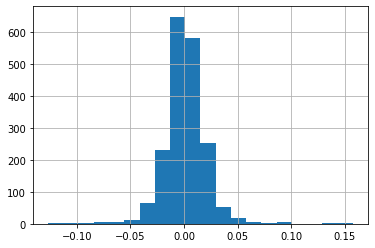

In [58]:
amzn_daily_return = amzn_daily_return.dropna()
amzn_daily_return.hist(bins =20)

In [59]:
mean = amzn_daily_return.mean()
mean

0.0012631309530525448

In [60]:
std = amzn_daily_return.std()
std

0.019861559267099153

Calculate the absolute value of the 'z-score' for each observation. 
The 'z-score' is
the number of standard deviations away from the mean:

In [61]:
abs_z_score = amzn_daily_return.sub(mean).abs().div(std)

In [62]:
abs_z_score.head()

Date
2010-01-05    0.233456
2010-01-06    0.975694
2010-01-07    0.920188
2010-01-08    1.299686
2010-01-11    1.274043
Name: Close, dtype: float64

In [63]:
employee = pd.read_csv('data/employee.csv')
employee.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22


Read in the employee data, assign the chosen departments, and import columns
to variables:

In [64]:
dept = ['Houston Police Department-HPD','Housston Fire Department (HFD)']
select_columns = ['UNIQUE_ID','DEPARTMENT','GENDER','BASE_SALARY']

In [65]:
qs = "DEPARTMENT"